<a href="https://colab.research.google.com/github/loop-04/Challenge-Python-para-DataScience/blob/main/Challenge-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Facturación Total por Tienda:
 Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


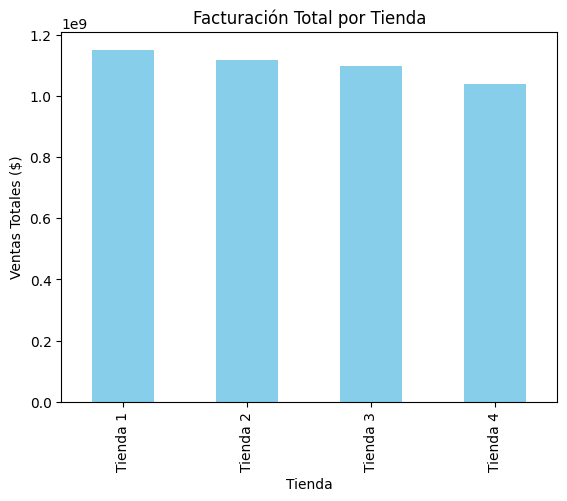

In [10]:
import matplotlib.pyplot as plt

# Add 'Tienda' column to each DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenate all DataFrames into df_total
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#1. Análisis de Facturación
facturacion = df_total.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print("Facturación Total por Tienda:\n", facturacion)

# Gráfico de barras
facturacion.plot(kind='bar', color='skyblue', title='Facturación Total por Tienda')
plt.ylabel('Ventas Totales ($)')
plt.show()

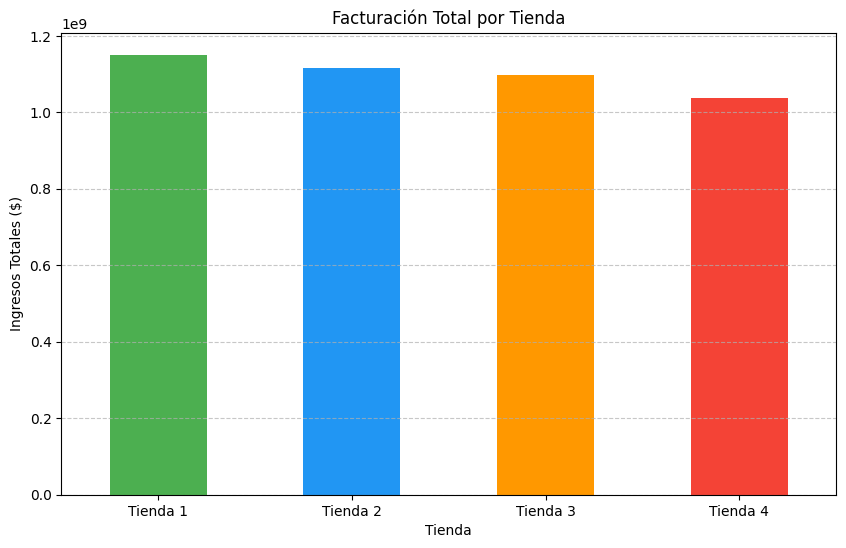

Categoría más popular por tienda:
       Tienda Categoría del Producto  Ventas
7   Tienda 1                Muebles     465
15  Tienda 2                Muebles     442
23  Tienda 3                Muebles     499
31  Tienda 4                Muebles     480


In [18]:
#2. Ventas por categoría
populares = df_total.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Ventas')
populares = populares.sort_values(['Tienda', 'Ventas'], ascending=[True, False])

# Mostrar la categoría top de cada tienda
plt.figure(figsize=(10, 6))
facturacion.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])
plt.title('Facturación Total por Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
top_categorias = populares.groupby('Tienda').head(1)
print("Categoría más popular por tienda:\n", top_categorias)

Promedio de Calificación por Tienda:
 Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


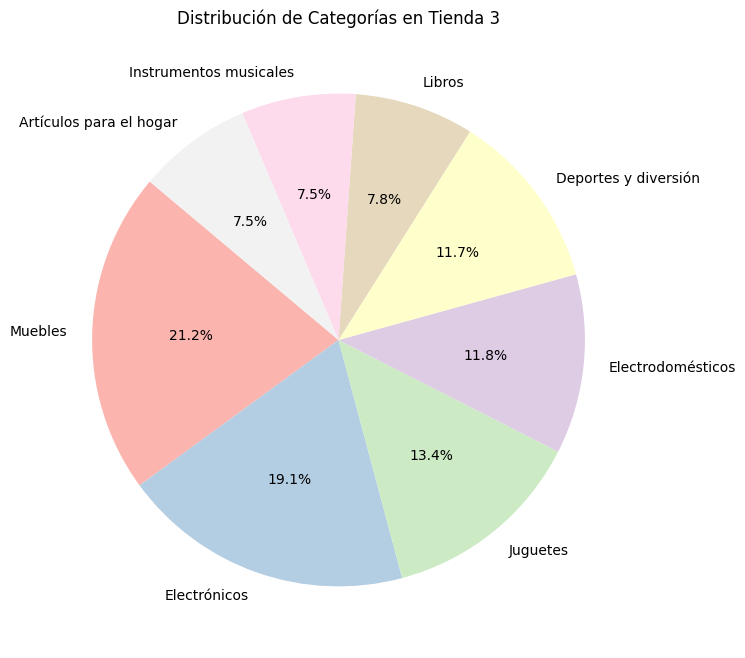

In [22]:
#3. Calificación promedio de la tienda
evaluacion = df_total.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print("Promedio de Calificación por Tienda:\n", evaluacion)

# Define top_tienda based on the highest average rating
top_tienda = evaluacion.index[0]

# Calculate the distribution of categories for the top_tienda
cat_populares = df_total[df_total['Tienda'] == top_tienda]['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
cat_populares.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title(f'Distribución de Categorías en {top_tienda}')
plt.ylabel('')
plt.show()

In [26]:
#4. Productos más y menos vendidos
for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    conteo = df_total[df_total['Tienda'] == tienda]['Producto'].value_counts()
    print(f"--- {tienda} ---")
    print(f"⭐ Mejor vendido: {conteo.idxmax()} ({conteo.max()} ventas)")
    print(f"📉 Menos vendido: {conteo.idxmin()} ({conteo.min()} ventas)\n")

--- Tienda 1 ---
⭐ Mejor vendido: Microondas (60 ventas)
📉 Menos vendido: Auriculares con micrófono (33 ventas)

--- Tienda 2 ---
⭐ Mejor vendido: Iniciando en programación (65 ventas)
📉 Menos vendido: Juego de mesa (32 ventas)

--- Tienda 3 ---
⭐ Mejor vendido: Kit de bancas (57 ventas)
📉 Menos vendido: Bloques de construcción (35 ventas)

--- Tienda 4 ---
⭐ Mejor vendido: Cama box (62 ventas)
📉 Menos vendido: Guitarra eléctrica (33 ventas)



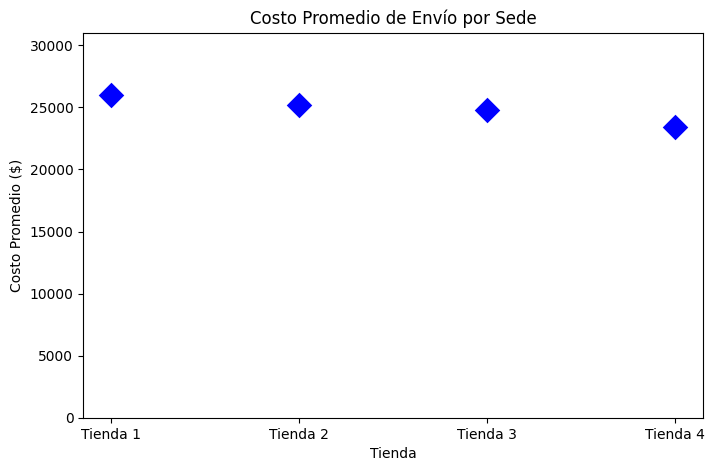

Costos de envío promedio:
     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


In [31]:
##5. Envío promedio por tienda

# Agrupamos para obtener el promedio por tienda
envio_prom = df_total.groupby('Tienda')['Costo de envío'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=envio_prom, x='Tienda', y='Costo de envío', s=200, color='blue', marker='D')
plt.title('Costo Promedio de Envío por Sede')
plt.ylabel('Costo Promedio ($)')
plt.ylim(0, envio_prom['Costo de envío'].max() + 5000) # Ajuste de escala
plt.show()

print("Costos de envío promedio:")
print(envio_prom)